In [2]:
from NeuralNetwork import Perceptron, Layer, ANN
from cross_validation import k_fold_cross_validation as k_fold_score
import matplotlib.pyplot as plt
import numpy as np
import math as math


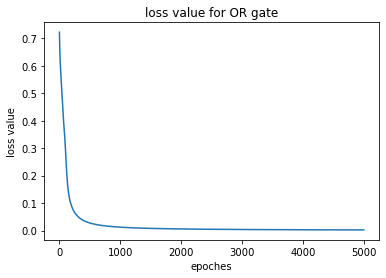

[0.00502956]
[0.99860883]
[0.99861254]
[0.99931082]


In [7]:

# the or gate
inputs=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
targets=np.array([[0],[1],[1],[1]])

def loss(prediction,target):
    return -target[0]*np.log(prediction[0])-(1-target[0])*np.log(1-prediction[0])

def loss_deriv(x,prediction,target):
    # epsilon = 1e-8
    # if(prediction[0] == 0):
    #     return -target[0]/epsilon + (1 - target[0])
    # elif(prediction[0] == 1):
    #     return -target[0] + (1 - target[0])/epsilon
    return -target[0]/prediction[0]+(1-target[0])/(1-prediction[0])

layers=[]
layers.append(Layer(1,2,"sigmoid"))
layers.append(Layer(1,1,"sigmoid"))

model=ANN(layers)

plot=[]
for x in range(5000):
    losss=model.train_one_epoch(inputs,targets,inputs,targets,0.5,0.001, loss, loss_deriv, 4)
    plot.append(losss[0])
#try your input and see the output!
plt.plot(range(5000),plot)
plt.title("loss value for OR gate")
plt.xlabel("epoches")
plt.ylabel("loss value")
plt.show()
print(model.predict([0,0]))
print(model.predict([0,1]))
print(model.predict([1,0]))
print(model.predict([1,1]))


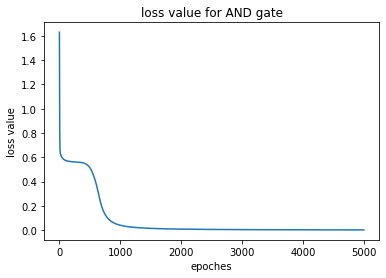

[0.00093031]
[0.00255827]
[0.00255827]
[0.99573135]


In [8]:
# the and gate
inputs=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
targets=np.array([[0],[0],[0],[1]])

def loss(prediction,target):
    return -target[0]*np.log(prediction[0])-(1-target[0])*np.log(1-prediction[0])

def loss_deriv(x,prediction,target):
    # epsilon = 1e-8
    # if(prediction[0] == 0):
    #     return -target[0]/epsilon + (1 - target[0])
    # elif(prediction[0] == 1):
    #     return -target[0] + (1 - target[0])/epsilon
    return -target[0]/prediction[0]+(1-target[0])/(1-prediction[0])

layers=[]
layers.append(Layer(1,2,"sigmoid"))
layers.append(Layer(1,1,"sigmoid"))

model=ANN(layers)

plot=[]
for x in range(5000):
    losss=model.train_one_epoch(inputs,targets,inputs,targets,0.5,0.001, loss, loss_deriv, 4)
    plot.append(losss[0])
#try your input and see the output!
plt.plot(range(5000),plot,label="loss")
plt.title("loss value for AND gate")
plt.xlabel("epoches")
plt.ylabel("loss value")
plt.show()
print(model.predict([0,0]))
print(model.predict([0,1]))
print(model.predict([1,0]))
print(model.predict([1,1]))

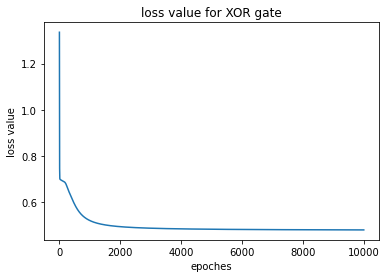

[0.66724321]
[0.66514325]
[0.66514325]
[0.003471]


In [7]:
# the or gate
inputs=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
targets=np.array([[0],[1],[1],[0]])

def loss(prediction,target):
    return -target[0]*np.log(prediction[0])-(1-target[0])*np.log(1-prediction[0])

def loss_deriv(x,prediction,target):
    # epsilon = 1e-8
    # if(prediction[0] == 0):
    #     return -target[0]/epsilon + (1 - target[0])
    # elif(prediction[0] == 1):
    #     return -target[0] + (1 - target[0])/epsilon
    return -target[0]/prediction[0]+(1-target[0])/(1-prediction[0])

layers=[]
layers.append(Layer(1,2,"sigmoid"))
layers.append(Layer(1,1,"sigmoid"))

model=ANN(layers)

plot=[]
for x in range(10000):
    losss=model.train_one_epoch(inputs,targets,inputs,targets,0.5,0.001, loss, loss_deriv, 4)
    plot.append(losss[0])
#try your input and see the output!
plt.plot(range(10000),plot)
plt.title("loss value for XOR gate")
plt.xlabel("epoches")
plt.ylabel("loss value")
plt.show()
print(model.predict([0,0]))
print(model.predict([0,1]))
print(model.predict([1,0]))
print(model.predict([1,1]))

In [8]:
#initial training without parameter tuning

features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
oh_targets=np.ndarray((len(targets),7))
for x in range(len(targets)):
    if targets[x]==1:
        oh_targets[x][0]=1
    if targets[x]==2:
        oh_targets[x][1]=1
    if targets[x]==3:
        oh_targets[x][2]=1
    if targets[x]==4:
        oh_targets[x][3]=1
    if targets[x]==5:
        oh_targets[x][4]=1
    if targets[x]==6:
        oh_targets[x][5]=1
    if targets[x]==7:
        oh_targets[x][6]=1

num_sample = np.shape(features)[0]
num_sample_train = int(num_sample * 0.75)
num_sample_validation = int(num_sample * 0.15)
num_sample_test = num_sample - num_sample_train - num_sample_validation

# Test set that gets reserved for testing after hyper-parameter tuning
X_test_set = features[0:num_sample_test]
y_test_set = oh_targets[0:num_sample_test]

# Validation and Train set
features = features[num_sample_test:]
oh_targets = oh_targets[num_sample_test:]

layers=[]
layers.append(Layer(12,10))
layers.append(Layer(9,12))
layers.append(Layer(7,9,"softmax"))

def loss_deriv(x,prediction,target):
    return -target[x]/prediction[x]+(1-target[x])/(1-prediction[x])
def loss(prediction,target):
    sum=0
    for x in range(len(target)):
        sum+=-target[x]*np.log(prediction[x])-(1-target[x])*np.log(1-prediction[x])
    return sum

model=ANN(layers)


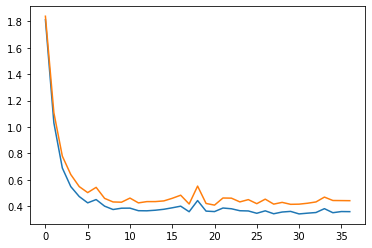

0.3598155996482427


In [2]:
loss_value=model.train(features,oh_targets, X_test_set, y_test_set,0.25,0.01,loss,loss_deriv,10)
plt.plot(range(len(loss_value[0])),loss_value[0],label="train loss")
plt.plot(range(len(loss_value[1])),loss_value[1],label="validation loss")
plt.legend(loc='upper center')
plt.show()

loss_value=0
for x in range(len(features)):
    a=loss(model.predict(features[x]),oh_targets[x])
    if not math.isnan(a):
        loss_value+=a
loss_value/=len(features)
print(loss_value)


In [3]:

# k-fold validation accuracy for the model
score = k_fold_score(features, oh_targets, model, loss, loss_deriv, 5, [0.26, 0.05, 1])
 
print(score)

KeyboardInterrupt: 

[0.8959660297239915, 0.8901627742392073, 0.9106864826610049, 0.8989384288747345, 0.9099787685774947, 0.9191790516631281, 0.9121019108280255, 0.9152158527954708, 0.9249823071479122, 0.9205944798301486]


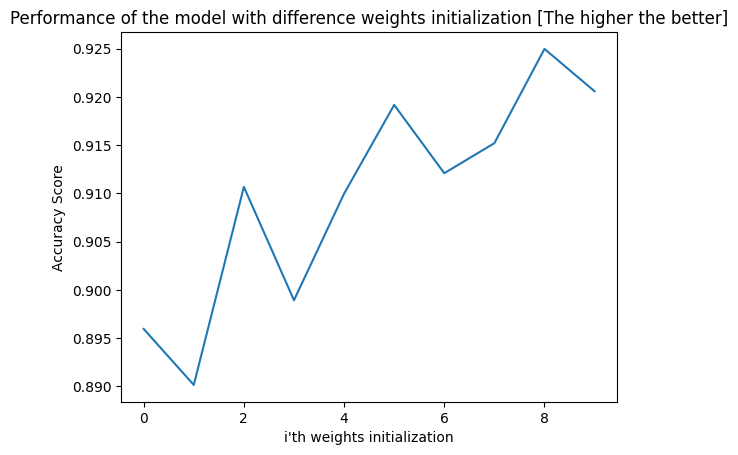

In [4]:
# Training 10 times for the randomized weight

scores = []
for i in range(10):
    scores.append(k_fold_score(features, oh_targets, model, loss, loss_deriv, 5, [0.26, 0.05, 1]))
print(scores)
plt.plot(scores)
plt.title("Performance of the model with difference weights initialization [The higher the better]")
plt.ylabel("Accuracy Score")
plt.xlabel("i'th weights initialization")
plt.show()

7
10
13
16
19
22
25
28


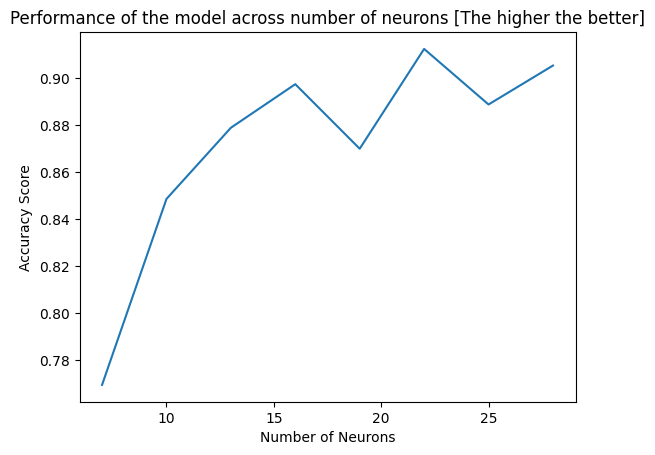

In [5]:
#searching for better hyperparameters

scores = []
hidden_neurons_number = []
layers=[]
# layers.append(Layer(12,10))
# layers.append(Layer(9,12))
# layers.append(Layer(7,9,"softmax"))

# start = 7
for start in range(7, 30, 3):
    firstLayerNeuron = int(start/2)
    layers = []
    layers.append(Layer(firstLayerNeuron, 10))
    layers.append(Layer(start - firstLayerNeuron, firstLayerNeuron))
    layers.append(Layer(7, start - firstLayerNeuron, "softmax"))

    print(start)
    modelTemp = ANN(layers)

    score = k_fold_score(features, oh_targets, modelTemp, loss, loss_deriv, 5, [0.26, 0.05, 1])

    scores.append(score)
    hidden_neurons_number.append(start)

plt.plot(hidden_neurons_number, scores)
plt.title("Performance of the model across number of neurons [The higher the better]")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neurons")
plt.show()

In [4]:
# Model with the best result: 
# 22 neurons 
# 0.25, 0.05, 10
layers = []
layers.append(Layer(11, 10))
layers.append(Layer(11, 11))
layers.append(Layer(7, 11))

model = ANN(layers)
loss_values = model.train(features, oh_targets, X_test_set, y_test_set, 0.26, 0.05, loss, loss_deriv, 10)


(2, 15)


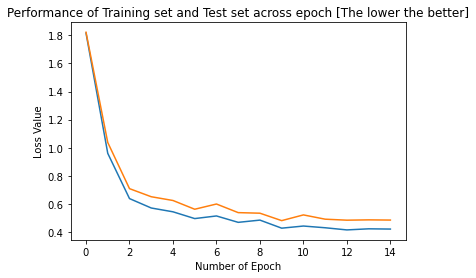

In [5]:
print(np.shape(loss_values))
plt.plot(loss_values[0],label="train loss")
plt.plot(loss_values[1],label="validation loss")
plt.title("Performance of Training set and Test set across epoch [The lower the better]")
plt.ylabel("Loss Value")
plt.xlabel("Number of Epoch")
plt.legend(loc='upper center')
plt.show()

In [ ]:
#final loss value
scores = []
loss_value=0
def loss(prediction,target):
    sum=0
    for x in range(len(target)):
        if prediction[x]!=0 and prediction[x]!=1:
            sum+=-target[x]*np.log(prediction[x])-(1-target[x])*np.log(1-prediction[x])
        elif prediction[x]!=0:
            sum+=-(1-target[x])*np.log(1-prediction[x])
        else:
            sum+=-target[x]*np.log(prediction[x])
    return sum
for x in range(len(features)):
    loss_value+=loss(features[x],oh_targets[x])
loss_value/=len(features)
print(loss_value)

In [15]:
# unknown sample
model.train(features, oh_targets, X_test_set[:1], y_test_set[:1], 0.26, 0.05, loss, loss_deriv, 10)
features_unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")
results = model.predictBatch(features_unknown)
resultResult = []
for i in range(len(results)):
    j=np.argmax(results[i])
    results[i,:] = 0
    results[i,j] = 1
for i in range(len(results)):
    count = 0
    j, = np.where(results[i] == 1)
    j = int(j)
    resultResult.append(j+1)


[2, 6, 7, 3, 6, 5, 1, 3, 7, 7, 3, 3, 1, 3, 6, 4, 2, 4, 2, 2, 7, 5, 6, 6, 5, 1, 1, 3, 1, 6, 6, 4, 4, 4, 4, 4, 5, 2, 2, 7, 4, 6, 5, 5, 5, 7, 5, 4, 5, 1, 5, 5, 2, 1, 6, 3, 1, 4, 1, 1, 3, 6, 3, 2, 7, 2, 2, 2, 7, 7, 7, 6, 7, 1, 4, 1, 4, 4, 1, 7, 1, 7, 1, 4, 4, 2, 3, 2, 1, 7, 6, 2, 7, 1, 2, 7, 2, 2, 5, 2, 5, 7, 5, 5, 2, 6, 5, 6, 2, 3, 7, 4, 1, 5, 5, 7, 5, 2, 4, 4, 7, 1, 2, 1, 1, 4, 7, 4, 7, 7, 7, 6, 6, 7, 7, 4, 4, 4, 3, 5, 3, 4, 1, 3, 2, 6, 6, 5, 4, 4, 7, 4, 1, 7, 1, 3, 7, 4, 3, 6, 7, 7, 3, 4, 1, 5, 6, 2, 5, 5, 3, 1, 6, 4, 7, 3, 3, 5, 5, 1, 3, 4, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 1, 6, 6, 2, 2, 3, 6, 7, 7, 2, 5, 3, 5, 6, 7, 4, 2, 2, 3, 6, 2, 6, 6, 4, 2, 6, 1, 3, 1, 3, 6, 2, 2, 6, 7, 1, 6, 1, 1, 5, 2, 4, 5, 4, 4, 4, 7, 7, 4, 1, 5, 5, 3, 1, 1, 6, 6, 5, 4, 4, 6, 2, 6, 1, 6, 1, 5, 3, 5, 3, 3, 6, 1, 2, 6, 6, 6, 2, 4, 5, 3, 5, 3, 3, 4, 7, 6, 4, 3, 6, 7, 2, 2, 7, 7, 2, 1, 4, 6, 3, 4, 5, 4, 6, 4, 7, 4, 4, 2, 1, 2, 5, 2, 2, 1, 3, 3, 1, 1, 7, 2, 4, 6, 7, 2, 2, 6, 5, 5, 6, 3, 4, 4, 7, 5, 6, 7, 3, 4, 6, 4, 

In [17]:
np.savetxt('Group_06_classes.txt', resultResult, delimiter=',')
print(len(resultResult))

784
